In [3]:
#import packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.base import clone
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score, f1_score, precision_score,recall_score
from sklearn.feature_selection import SequentialFeatureSelector, RFE, VarianceThreshold, mutual_info_classif, SelectKBest, chi2

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import tensorflow as tf
# from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.layers import Dense
# import random
# from keras import backend as K 

In [4]:
full_data = pd.read_csv('MCSDatasetNEXTCONLab.csv')

In [5]:
full_data.head()

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
0,1,45.442142,-75.303369,1,4,13,40,40,9,91,0,131380,1
1,1,45.442154,-75.304366,1,4,23,40,30,9,91,0,131380,1
2,1,45.442104,-75.303963,1,4,33,40,20,9,91,0,121996,1
3,1,45.441868,-75.303577,1,4,43,40,10,9,91,0,121996,1
4,2,45.447727,-75.147722,2,15,49,30,30,5,47,0,140784,1


In [6]:
full_data.shape

(14484, 13)

In [7]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14484 entries, 0 to 14483
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             14484 non-null  int64  
 1   Latitude       14484 non-null  float64
 2   Longitude      14484 non-null  float64
 3   Day            14484 non-null  int64  
 4   Hour           14484 non-null  int64  
 5   Minute         14484 non-null  int64  
 6   Duration       14484 non-null  int64  
 7   RemainingTime  14484 non-null  int64  
 8   Resources      14484 non-null  int64  
 9   Coverage       14484 non-null  int64  
 10  OnPeakHours    14484 non-null  int64  
 11  GridNumber     14484 non-null  int64  
 12  Ligitimacy     14484 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 1.4 MB


In [8]:
full_data.describe()

,ID,Latitude,Longitude,Day,Hour,Minute,Duration,RemainingTime,Resources,Coverage,OnPeakHours,GridNumber,Ligitimacy
count,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000,14484.000000
mean,2009.362745,45.484035,-75.217603,2.513946,12.348177,29.480185,44.219829,27.109914,5.838097,65.292184,0.182822,199039.373239,0.869028
std,1164.521555,0.058989,0.054501,1.704509,6.538839,17.353324,14.511027,14.993890,2.878052,20.311306,0.386534,101695.208646,0.337381
min,1.000000,45.365600,-75.334116,0.000000,0.000000,0.000000,10.000000,10.000000,1.000000,30.000000,0.000000,-9363.000000,0.000000
25%,989.000000,45.434521,-75.264506,1.000000,7.000000,14.000000,30.000000,10.000000,3.000000,48.000000,0.000000,112621.000000,1.000000
50%,2025.000000,45.484917,-75.220013,2.000000,13.000000,29.000000,50.000000,20.000000,6.000000,65.000000,0.000000,197082.000000,1.000000
75%,3011.000000,45.541527,-75.173048,4.000000,18.000000,45.000000,60.000000,40.000000,8.000000,82.000000,0.000000,300297.000000,1.000000
max,4000.000000,45.584678,-75.088915,6.000000,23.000000,59.000000,60.000000,60.000000,10.000000,100.000000,1.000000,375388.000000,1.000000


In [9]:
full_data.isnull().sum()

ID               0
Latitude         0
Longitude        0
Day              0
Hour             0
Minute           0
Duration         0
RemainingTime    0
Resources        0
Coverage         0
OnPeakHours      0
GridNumber       0
Ligitimacy       0
dtype: int64

In [10]:
full_data.shape

(14484, 13)

In [11]:
train_days = [0,1,2,3,4]
test_days = [5,6]

unscaled_train_data = full_data[full_data.Day.isin(train_days)].drop("Day",axis=1)
unscaled_test_data = full_data[full_data.Day.isin(test_days)].drop("Day",axis=1)

In [12]:
unscaled_train_features = unscaled_train_data.iloc[:,:-1]
unscaled_test_features = unscaled_test_data.iloc[:,:-1]

train_label = unscaled_train_data.iloc[:,-1].to_numpy()
test_label = unscaled_test_data.iloc[:,-1].to_numpy()

In [13]:
column_names = list(unscaled_train_features.columns)

In [14]:
print(full_data.columns)
print(unscaled_train_features.columns)
print(unscaled_test_features.columns)

Index(['ID', 'Latitude', 'Longitude', 'Day', 'Hour', 'Minute', 'Duration',
       'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber',
       'Ligitimacy'],
      dtype='object')
Index(['ID', 'Latitude', 'Longitude', 'Hour', 'Minute', 'Duration',
       'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber'],
      dtype='object')
Index(['ID', 'Latitude', 'Longitude', 'Hour', 'Minute', 'Duration',
       'RemainingTime', 'Resources', 'Coverage', 'OnPeakHours', 'GridNumber'],
      dtype='object')


In [15]:
scaler = MinMaxScaler()
train_features = scaler.fit_transform(unscaled_train_features)
test_features = scaler.transform(unscaled_test_features)

In [16]:
def TSNE_Plot(x,y,classes,type):
    tsne_model=TSNE(n_components=2, random_state=42)
    tsne_data=tsne_model.fit_transform(x)

    fig, ax=plt.subplots()

    sc = ax.scatter(tsne_data[:,0], tsne_data[:,1], c=y, cmap='brg')
    plt.title("t-SNE plot {}".format(type))
    plt.ylabel("t-SNE feature 0")
    plt.xlabel("t-SNE feature 1")
    ax.legend(*sc.legend_elements(num=classes), title='clusters')
    plt.show()

c:\users\ritik\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\collections.py:1053: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if num == "auto":


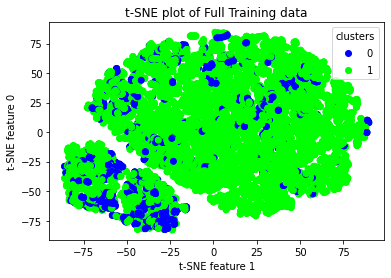

In [17]:
_ = TSNE_Plot(train_features,train_label,np.unique(train_label),'of Full Training data')

c:\users\ritik\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\collections.py:1053: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if num == "auto":


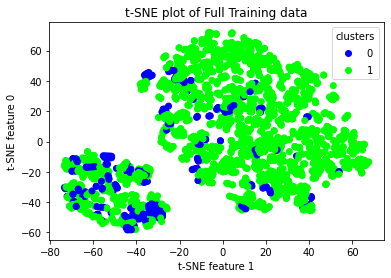

In [18]:
_ = TSNE_Plot(test_features,test_label,np.unique(test_label),'of Full Training data')

In [19]:
knn_baseline = KNeighborsClassifier()
logreg_baseline = LogisticRegression(random_state=42)
svm_baseline = svm.SVC(random_state=42)
dt_baseline = DecisionTreeClassifier(random_state=42)
nb_baseline = GaussianNB()

baseline_test_acc = []

model_list = [knn_baseline, logreg_baseline, svm_baseline, dt_baseline, nb_baseline]
model_name_list = ['knn', 'logistic_regression', 'svm', 'decision_tree', 'naive_bayes']

In [20]:
def evaluation(model, train_features, train_label, test_features, test_label=None, CM=0):
    model.fit(train_features, train_label)
    pred_labels = model.predict(test_features)
    
    model_acc = accuracy_score(test_label, pred_labels)
    
    if CM == 1:
        plot_confusion_matrix(model, test_features, test_label)
    plt.show()
    return round(model_acc,5)

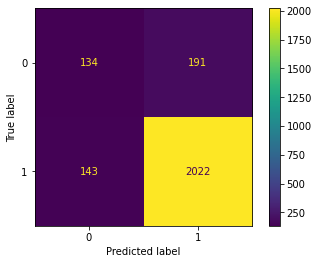

knn baseline accuracy : 86.586


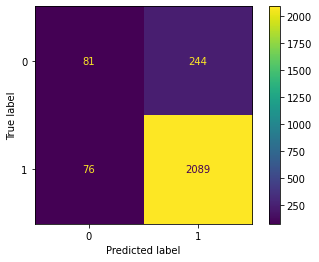

logistic_regression baseline accuracy : 87.149


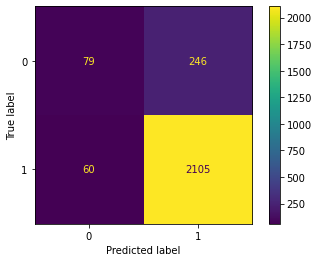

svm baseline accuracy : 87.711


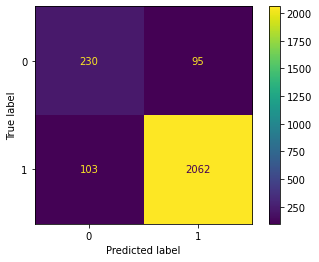

decision_tree baseline accuracy : 92.048


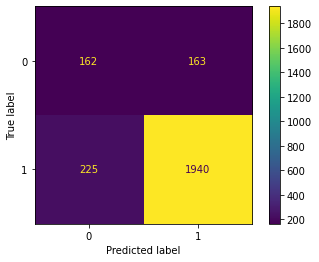

naive_bayes baseline accuracy : 84.418


In [21]:
for i in range(len(model_list)):
    res_acc = evaluation(model_list[i], train_features, train_label, test_features, test_label, CM=1)
    print("{} baseline accuracy : {}".format(model_name_list[i],res_acc*100))
    baseline_test_acc.append(res_acc)

In [22]:
baseline_test_acc

[0.86586, 0.87149, 0.87711, 0.92048, 0.84418]

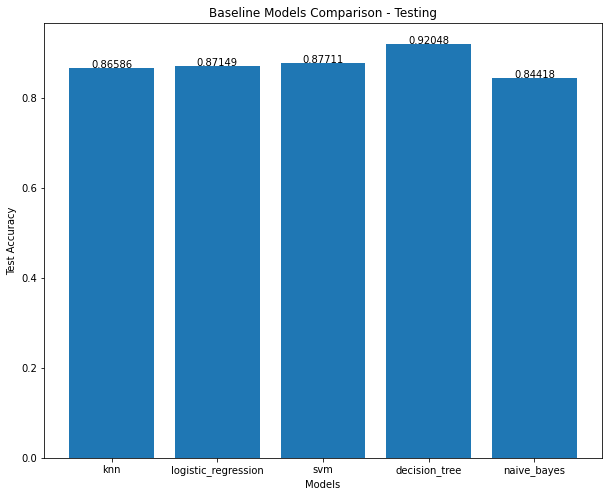

In [23]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.figure(figsize=(10,8))
plt.xlabel("Models")
plt.ylabel("Test Accuracy")
plt.title('Baseline Models Comparison - Testing')
plt.bar(range(len(baseline_test_acc)), baseline_test_acc, tick_label=model_name_list)
addlabels(model_name_list,baseline_test_acc)
plt.show()

# PCA

In [24]:
model_name_list = ['knn', 'logistic_regression', 'svm', 'decision_tree', 'naive_bayes']
pca_acc_list = ['knn_pca_acc', 'logreg_pca_acc', 'svm_pca_acc', 'dt_pca_acc', 'nb_pca_acc']

knn_pca = KNeighborsClassifier()
logreg_pca = LogisticRegression(random_state=42)
svm_pca = svm.SVC(random_state=42)
dt_pca = DecisionTreeClassifier(random_state=42)
nb_pca = GaussianNB()

model_list_pca = [knn_pca, logreg_pca, svm_pca, dt_pca, nb_pca]

In [25]:
def pca_evaluation(model,train_features, train_label, test_features, test_label, acc_list):
    for n_comp in range(1, 12):
        pca = PCA(n_components=n_comp,random_state=42)
        pca_train = pca.fit_transform(train_features)
        pca_test = pca.transform(test_features)
        
        model.fit(pca_train, train_label)
        pred_labels = model.predict(pca_test)
    
        model_acc = accuracy_score(test_label, pred_labels)
        acc_list.append(round(model_acc,5))
    return acc_list

In [26]:
for i in range(len(pca_acc_list)):
    pca_acc_list[i] = []
    pca_acc_list[i] = pca_evaluation(model_list_pca[i],train_features, train_label, test_features, test_label, pca_acc_list[i])

In [27]:
def acc_vs_fea_pca(model_name,acc_list,baseline_acc):
    plt.figure()
    plt.title('Test Accuracy of {} Classifier vs Number of Principal Components'.format(model_name))
    plt.xlabel('Number of Components')
    plt.ylabel('Test Accuracy')
    plt.xticks(np.arange(len(acc_list)), np.arange(1, len(acc_list)+1))
    plt.plot(acc_list, color='blue', label=model_name)
    plt.axhline(baseline_acc, color = 'red', linestyle = '-.',label='Baseline')
    plt.legend()
    plt.show()

In [29]:
for i in range(len(model_name_list)):
    print(pca_acc_list[i])

[0.85944, 0.86426, 0.86707, 0.85542, 0.8494, 0.85502, 0.83976, 0.84378, 0.86506, 0.86546, 0.86586]
[0.87068, 0.87189, 0.86867, 0.86586, 0.86627, 0.86627, 0.86546, 0.86305, 0.87028, 0.87149, 0.87149]
[0.86948, 0.86627, 0.86265, 0.87028, 0.86988, 0.86988, 0.86747, 0.86707, 0.8759, 0.87671, 0.87671]
[0.79799, 0.84337, 0.83695, 0.85221, 0.84096, 0.83976, 0.82972, 0.84699, 0.88996, 0.88996, 0.88996]
[0.8506, 0.84859, 0.85542, 0.85703, 0.85743, 0.85663, 0.85863, 0.84458, 0.849, 0.8494, 0.8498]


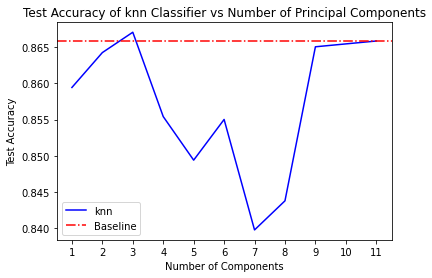

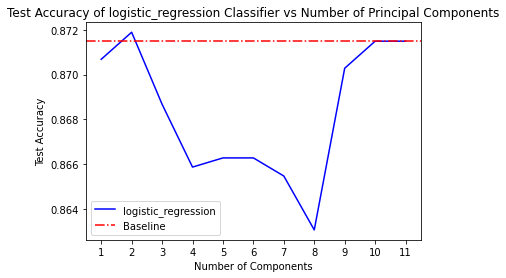

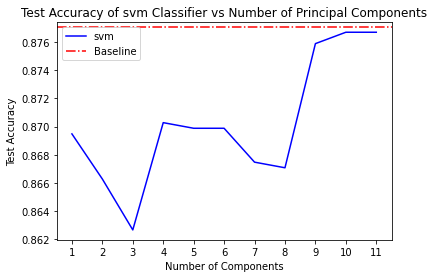

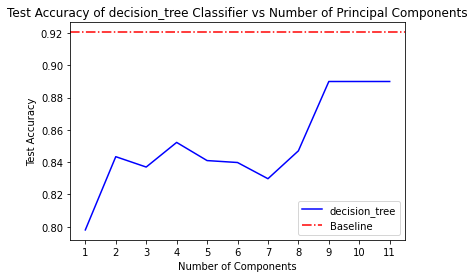

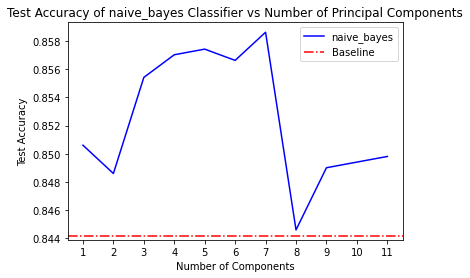

In [69]:
for i in range(len(model_name_list)):
    acc_vs_fea_pca(model_name_list[i],pca_acc_list[i],baseline_test_acc[i])

# Auto Encoder

In [99]:
model_name_list = ['knn', 'logistic_regression', 'svm', 'decision_tree', 'naive_bayes']
ae_acc_list = ['knn_ae_acc', 'logreg_ae_acc', 'svm_ae_acc', 'dt_ae_acc', 'nb_ae_acc']

knn_ae = KNeighborsClassifier()
logreg_ae = LogisticRegression(random_state=42)
svm_ae = svm.SVC(random_state=42)
dt_ae = DecisionTreeClassifier(random_state=42)
nb_ae = GaussianNB()

model_list_ae = [knn_ae, logreg_ae, svm_ae, dt_ae, nb_ae]

In [113]:
for i in range(1,12):
    # This is the dimension of the original space
    input_dim = 11

    # This is the dimension of the latent space (encoding space)
    latent_dim = i

    encoder = Sequential([
        Dense(256, activation='relu', input_shape=(input_dim,)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(latent_dim, activation='relu')
    ])

    decoder = Sequential([
        Dense(64, activation='relu', input_shape=(latent_dim,)),
        Dense(128, activation='relu'),
        Dense(256, activation='relu'),
        Dense(input_dim, activation=None)
    ])
    
    autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
    autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
    
    autoencoder.fit(train_features, train_features, epochs=100, batch_size=32, verbose=0)
    
    encoded_x_train = encoder(train_features)
    encoded_x_test = encoder(test_features)
    
    for j in range(len(model_list_ae)):
        res_acc = evaluation(model_list_ae[j], encoded_x_train, train_label, encoded_x_test, test_label, CM=0)
        if i == 1:
            ae_acc_list[j] = []
            ae_acc_list[j].append(res_acc)
        else:
            ae_acc_list[j].append(res_acc)

In [114]:
for k in range(len(ae_acc_list)):
    print(ae_acc_list[k])

[0.85622, 0.84337, 0.849, 0.8494, 0.85582, 0.85984, 0.85542, 0.8498, 0.85341, 0.84859, 0.84217]
[0.8739, 0.86948, 0.86948, 0.86305, 0.86948, 0.86185, 0.86627, 0.86345, 0.85863, 0.86787, 0.86908]
[0.86948, 0.86948, 0.86948, 0.86627, 0.86948, 0.86426, 0.86948, 0.87068, 0.86948, 0.86948, 0.86948]
[0.81205, 0.81165, 0.80321, 0.81727, 0.78715, 0.8261, 0.81847, 0.81285, 0.80241, 0.76787, 0.81084]
[0.849, 0.86948, 0.86948, 0.81526, 0.86948, 0.13976, 0.85462, 0.80683, 0.22972, 0.71847, 0.72329]


In [115]:
def acc_vs_fea_ae(model_name,acc_list,baseline_acc):
    plt.figure()
    plt.title('Test Accuracy of {} Classifier vs Number of Dimensions in latent space'.format(model_name))
    plt.xlabel('Number of Dimensions in latent space in AE')
    plt.ylabel('Test Accuracy')
    plt.xticks(np.arange(len(acc_list)), np.arange(1, len(acc_list)+1))
    plt.plot(acc_list, color='blue', label=model_name)
    plt.axhline(baseline_acc, color = 'red', linestyle = '-.',label='Baseline')
    plt.legend()
    plt.show()

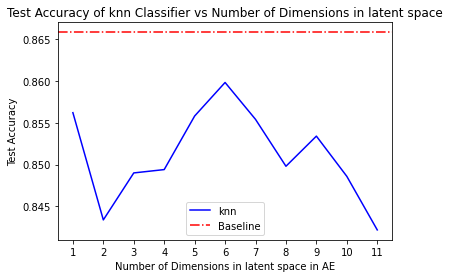

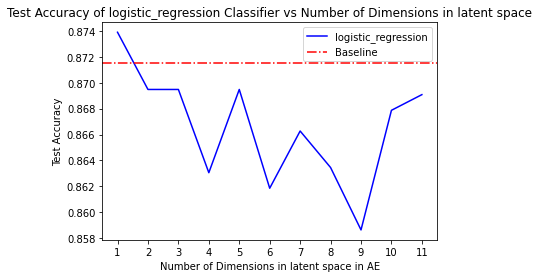

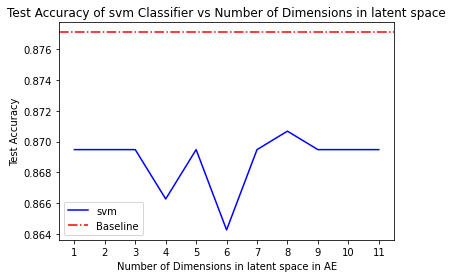

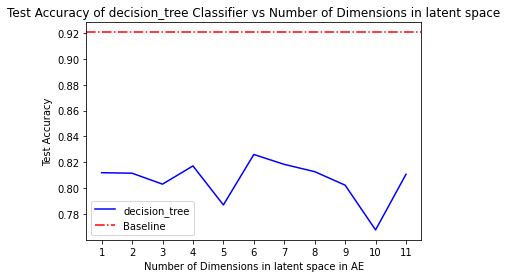

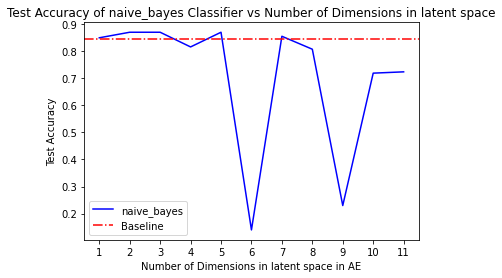

In [116]:
for i in range(len(model_name_list)):
    acc_vs_fea_ae(model_name_list[i],ae_acc_list[i],baseline_test_acc[i])

## Forward Feature Elimination

In [118]:
model_name_list = ['knn', 'logistic_regression', 'svm', 'decision_tree', 'naive_bayes']
frwrd_acc_list = ['knn_frwrd_acc', 'logreg_frwrd_acc', 'svm_frwrd_acc', 'dt_frwrd_acc', 'nb_frwrd_acc']

knn_frwrd = KNeighborsClassifier()
logreg_frwrd = LogisticRegression(random_state=42)
svm_frwrd = svm.SVC(random_state=42)
dt_frwrd = DecisionTreeClassifier(random_state=42)
nb_frwrd = GaussianNB()

model_list_frwrd = [knn_frwrd, logreg_frwrd, svm_frwrd, dt_frwrd, nb_frwrd]

In [122]:
def frwd_feature_elim(model, train_features, train_label, test_features, n_features):
    sfs = SequentialFeatureSelector(model, n_features_to_select=n_features)
    sfs.fit(train_features, train_label)
    
    x_train = sfs.transform(train_features)
    x_test = sfs.transform(test_features)
    return x_train, x_test

for i in range(1,11):
    for j in range(len(model_list_frwrd)):
        frwrd_train_features, frwrd_test_features = frwd_feature_elim(model_list_frwrd[j], train_features, train_label, test_features, i)
        res_acc = evaluation(model_list_frwrd[j], frwrd_train_features, train_label, frwrd_test_features, test_label, CM=0)
        if i == 1:
            frwrd_acc_list[j] = []
            frwrd_acc_list[j].append(res_acc)
        else:
            frwrd_acc_list[j].append(res_acc)

In [127]:
def acc_vs_fea_frwrd(model_name,acc_list,baseline_acc):
    plt.figure()
    plt.title('Test Accuracy of {} Classifier with Forward Feature Elimination vs Number of features'.format(model_name))
    plt.xlabel('Number of features')
    plt.ylabel('Test Accuracy')
    plt.xticks(np.arange(len(acc_list)), np.arange(1, len(acc_list)+1))
    plt.plot(acc_list, color='blue', label=model_name)
    plt.axhline(baseline_acc, color = 'red', linestyle = '-.',label='Baseline')
    plt.legend()
    plt.show()

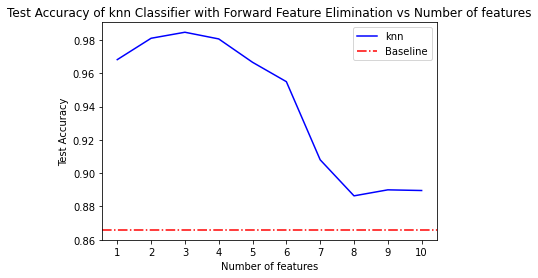

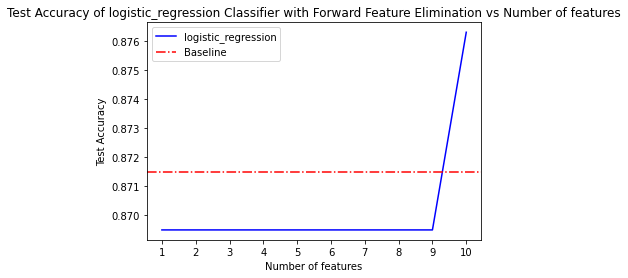

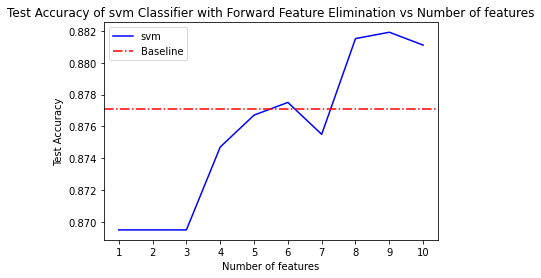

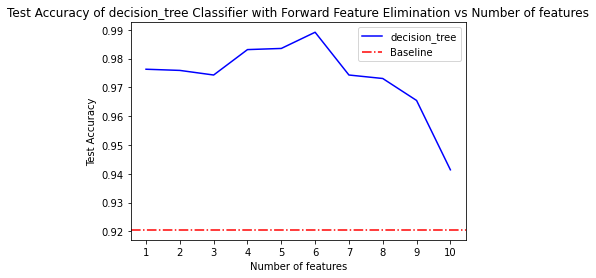

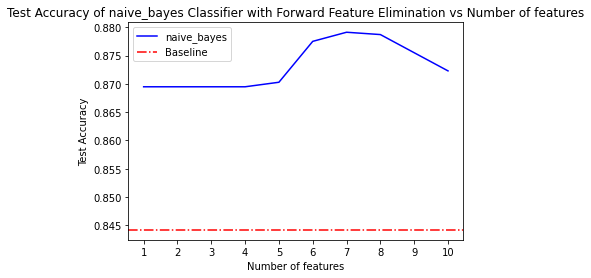

In [128]:
for i in range(len(model_name_list)):
    acc_vs_fea_frwrd(model_name_list[i],frwrd_acc_list[i],baseline_test_acc[i])

## Backward Feature Elimination

In [141]:
model_name_list = ['knn', 'logistic_regression', 'svm', 'decision_tree', 'naive_bayes']
bkwrd_acc_list = ['knn_bkwrd_acc', 'logreg_bkwrd_acc', 'svm_bkwrd_acc', 'dt_bkwrd_acc', 'nb_bkwrd_acc']
bkwrd_acc_list1 = ['knn_bkwrd_acc1', 'logreg_bkwrd_acc1', 'svm_bkwrd_acc1', 'dt_bkwrd_acc1', 'nb_bkwrd_acc1']

knn_bkwrd = KNeighborsClassifier()
logreg_bkwrd = LogisticRegression(random_state=42)
svm_bkwrd = svm.SVC(random_state=42)
dt_bkwrd = DecisionTreeClassifier(random_state=42)
nb_bkwrd = GaussianNB()

model_list_bkwrd = [knn_bkwrd, logreg_bkwrd, svm_bkwrd, dt_bkwrd, nb_bkwrd]

In [ ]:
def bkwrd_feature_elim(model, train_features, train_label, test_features, n_features):
    sfs = SequentialFeatureSelector(model, n_features_to_select=n_features, direction='backward')
    sfs.fit(train_features, train_label)
    
    x_train = sfs.transform(train_features)
    x_test = sfs.transform(test_features)
    return x_train, x_test

for i in range(1,11):
    for j in range(len(model_list_bkwrd)):
        bkwrd_train_features, bkwrd_test_features = bkwrd_feature_elim(model_list_bkwrd[j], train_features, train_label, test_features, i)
        res_acc = evaluation(model_list_bkwrd[j], bkwrd_train_features, train_label, bkwrd_test_features, test_label, CM=0)
        if i == 1:
            bkwrd_acc_list[j] = []
            bkwrd_acc_list[j].append(res_acc)
        else:
            bkwrd_acc_list[j].append(res_acc)

In [139]:
def acc_vs_fea_bkwrd(model_name,acc_list,baseline_acc):
    plt.figure()
    plt.title('Test Accuracy of {} Classifier with Backward Feature Elimination vs Number of features'.format(model_name))
    plt.xlabel('Number of features')
    plt.ylabel('Test Accuracy')
    plt.xticks(np.arange(len(acc_list)), np.arange(1, len(acc_list)+1))
    plt.plot(acc_list, color='blue', label=model_name)
    plt.axhline(baseline_acc, color = 'red', linestyle = '-.',label='Baseline')
    plt.legend()
    plt.show()

In [ ]:
for i in range(len(model_name_list)):
    

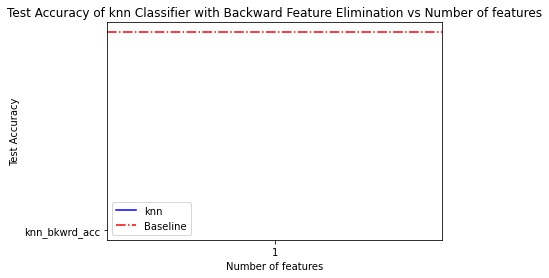

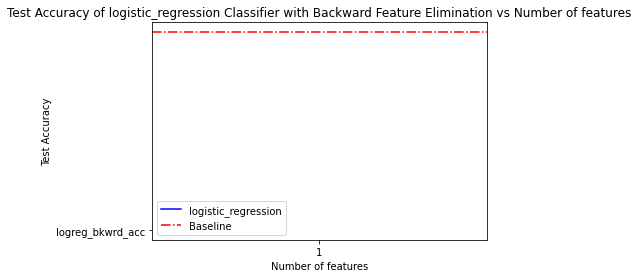

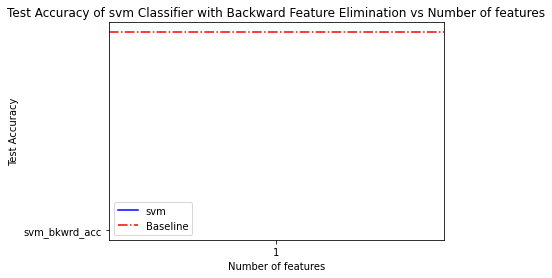

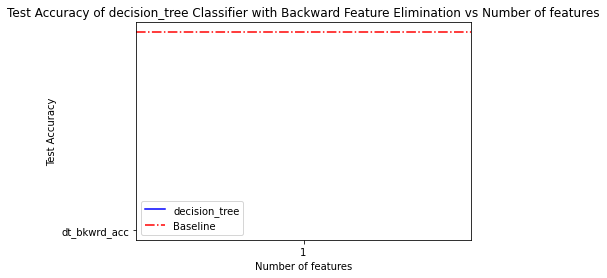

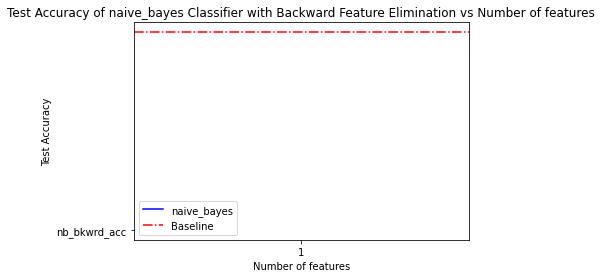

In [142]:
for i in range(len(model_name_list)):
    acc_vs_fea_bkwrd(model_name_list[i],bkwrd_acc_list[i],baseline_test_acc[i])

## Information Gain

In [30]:
model_name_list = ['knn', 'logistic_regression', 'svm', 'decision_tree', 'naive_bayes']
kbest_mutual_acc_list = ['knn_kbest_mutual_acc', 'logreg_kbest_mutual_acc', 'svm_kbest_mutual_acc', 'dt_kbest_mutual_acc', 'nb_kbest_mutual_acc']

knn_kbest_mutual = KNeighborsClassifier()
logreg_kbest_mutual = LogisticRegression(random_state=42)
svm_kbest_mutual = svm.SVC(random_state=42)
dt_kbest_mutual = DecisionTreeClassifier(random_state=42)
nb_kbest_mutual = GaussianNB()

model_list_kbest_mutual = [knn_kbest_mutual, logreg_kbest_mutual, svm_kbest_mutual, dt_kbest_mutual, nb_kbest_mutual]

In [31]:
def kbest_mutual(train_features, train_label, test_features, n_features):
    kbest = SelectKBest(mutual_info_classif, k=i)
    kbest.fit(train_features, train_label)
    
    x_train = kbest.transform(train_features)
    x_test = kbest.transform(test_features)
    return x_train, x_test

for i in range(1,12):
    kbest_mutual_train_features, kbest_mutual_test_features = kbest_mutual(train_features, train_label, test_features, i)
    for j in range(len(model_list_kbest_mutual)):
        res_acc = evaluation(model_list_kbest_mutual[j], kbest_mutual_train_features, train_label, kbest_mutual_test_features, test_label, CM=0)
        if i == 1:
            kbest_mutual_acc_list[j] = []
            kbest_mutual_acc_list[j].append(res_acc)
        else:
            kbest_mutual_acc_list[j].append(res_acc)

In [32]:
def acc_vs_fea_kbest_mutual(model_name,acc_list,baseline_acc):
    plt.figure()
    plt.title('Test Accuracy of {} Classifier with Information Gain vs Number of features'.format(model_name))
    plt.xlabel('Number of features')
    plt.ylabel('Test Accuracy')
    plt.xticks(np.arange(len(acc_list)), np.arange(1, len(acc_list)+1))
    plt.plot(acc_list, color='blue', label=model_name)
    plt.axhline(baseline_acc, color = 'red', linestyle = '-.',label='Baseline')
    plt.legend()
    plt.show()

In [40]:
for k in range(len(kbest_mutual_acc_list)):
    print(kbest_mutual_acc_list[k])

[0.76225, 0.83012, 0.83494, 0.93454, 0.9241, 0.92088, 0.87912, 0.85181, 0.84096, 0.85141, 0.86586]
[0.86948, 0.86948, 0.86948, 0.86948, 0.86948, 0.8755, 0.86948, 0.86386, 0.87269, 0.87309, 0.87149]
[0.86948, 0.86948, 0.86948, 0.86948, 0.87711, 0.88072, 0.8755, 0.88153, 0.88193, 0.88072, 0.87711]
[0.77992, 0.95261, 0.96586, 0.98072, 0.97831, 0.97309, 0.93655, 0.92169, 0.92651, 0.9249, 0.92048]
[0.86948, 0.86948, 0.86948, 0.86948, 0.86948, 0.80562, 0.83133, 0.83815, 0.84096, 0.84418, 0.84418]


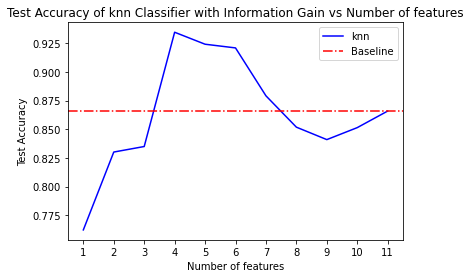

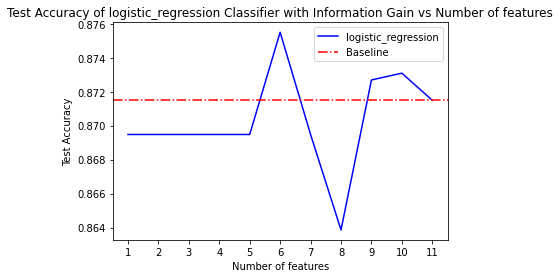

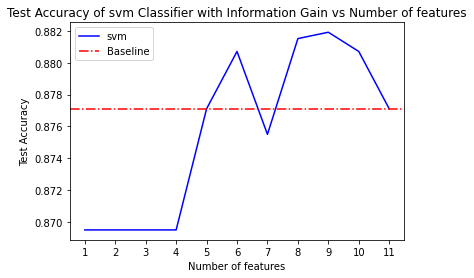

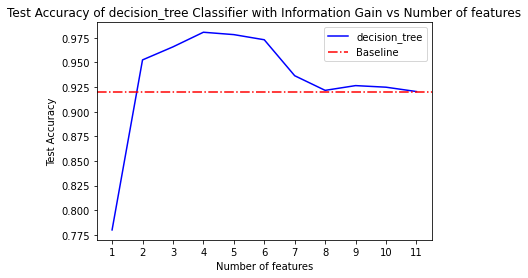

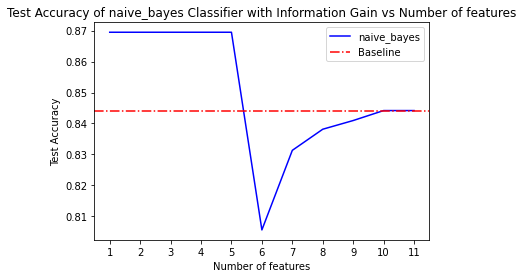

In [33]:
for i in range(len(model_name_list)):
    acc_vs_fea_kbest_mutual(model_name_list[i],kbest_mutual_acc_list[i],baseline_test_acc[i])

## CHI Square

In [34]:
model_name_list = ['knn', 'logistic_regression', 'svm', 'decision_tree', 'naive_bayes']
kbest_chi2_acc_list = ['knn_kbest_chi2_acc', 'logreg_kbest_chi2_acc', 'svm_kbest_chi2_acc', 'dt_kbest_chi2_acc', 'nb_kbest_chi2_acc']

knn_kbest_chi2 = KNeighborsClassifier()
logreg_kbest_chi2 = LogisticRegression(random_state=42)
svm_kbest_chi2 = svm.SVC(random_state=42)
dt_kbest_chi2 = DecisionTreeClassifier(random_state=42)
nb_kbest_chi2 = GaussianNB()

model_list_kbest_chi2 = [knn_kbest_chi2, logreg_kbest_chi2, svm_kbest_chi2, dt_kbest_chi2, nb_kbest_chi2]

In [35]:
def kbest_chi2(train_features, train_label, test_features, n_features):
    kbest = SelectKBest(chi2, k=i)
    kbest.fit(train_features, train_label)
    
    x_train = kbest.transform(train_features)
    x_test = kbest.transform(test_features)
    return x_train, x_test

for i in range(1,12):
    kbest_chi2_train_features, kbest_chi2_test_features = kbest_chi2(train_features, train_label, test_features, i)
    for j in range(len(model_list_kbest_chi2)):
        res_acc = evaluation(model_list_kbest_chi2[j], kbest_chi2_train_features, train_label, kbest_chi2_test_features, test_label, CM=0)
        if i == 1:
            kbest_chi2_acc_list[j] = []
            kbest_chi2_acc_list[j].append(res_acc)
        else:
            kbest_chi2_acc_list[j].append(res_acc)

In [36]:
def acc_vs_fea_kbest_chi2(model_name,acc_list,baseline_acc):
    plt.figure()
    plt.title('Test Accuracy of {} Classifier with chi square vs Number of features'.format(model_name))
    plt.xlabel('Number of features')
    plt.ylabel('Test Accuracy')
    plt.xticks(np.arange(len(acc_list)), np.arange(1, len(acc_list)+1))
    plt.plot(acc_list, color='blue', label=model_name)
    plt.axhline(baseline_acc, color = 'red', linestyle = '-.',label='Baseline')
    plt.legend()
    plt.show()

In [39]:
for k in range(len(kbest_chi2_acc_list)):
    print(kbest_chi2_acc_list[k])

[0.86948, 0.84056, 0.85944, 0.86667, 0.86024, 0.88394, 0.88876, 0.88635, 0.87791, 0.85141, 0.86586]
[0.86948, 0.85422, 0.85542, 0.85542, 0.86667, 0.86707, 0.86707, 0.86787, 0.86827, 0.87309, 0.87149]
[0.86948, 0.86948, 0.86426, 0.86024, 0.87349, 0.87952, 0.88153, 0.87992, 0.88032, 0.88072, 0.87711]
[0.86948, 0.86064, 0.86627, 0.86466, 0.88715, 0.95863, 0.97229, 0.9502, 0.94056, 0.9249, 0.92048]
[0.79839, 0.83494, 0.84177, 0.84257, 0.84538, 0.84618, 0.8502, 0.84297, 0.84458, 0.84418, 0.84418]


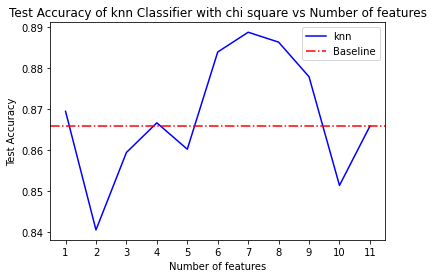

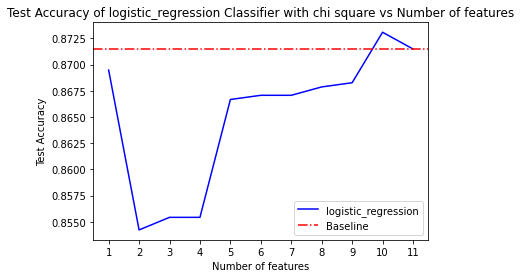

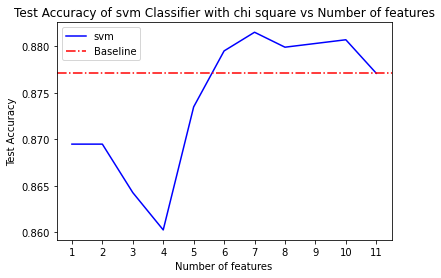

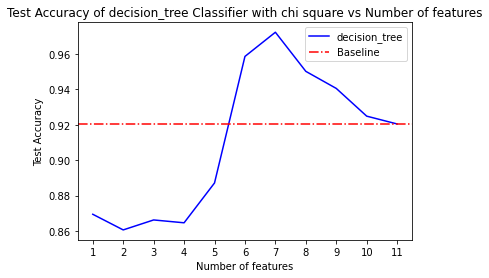

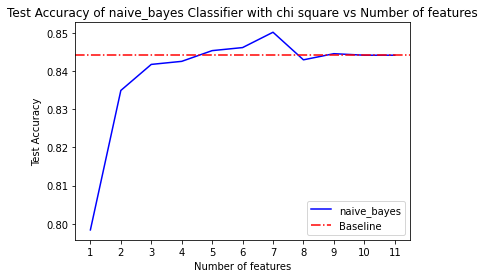

In [37]:
for i in range(len(model_name_list)):
    acc_vs_fea_kbest_chi2(model_name_list[i],kbest_chi2_acc_list[i],baseline_test_acc[i])

In [42]:
kbest = SelectKBest(mutual_info_classif, k=4)

In [43]:
kbest.fit(train_features, train_label)

SelectKBest(k=4, score_func=<function mutual_info_classif at 0x1AB73148>)

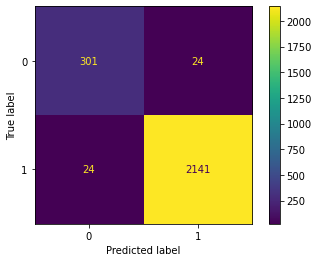

In [59]:
x_train = kbest.transform(train_features)
x_test = kbest.transform(test_features)
dt_best = DecisionTreeClassifier(random_state=42)
dt_best.fit(x_train, train_label)
pred_labels = dt_best.predict(x_test)
plot_confusion_matrix(dt_best, x_test, test_label)

In [60]:
print(confusion_matrix(pred_labels, test_label))

[[ 301   24]
 [  24 2141]]


c:\users\ritik\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\collections.py:1053: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if num == "auto":


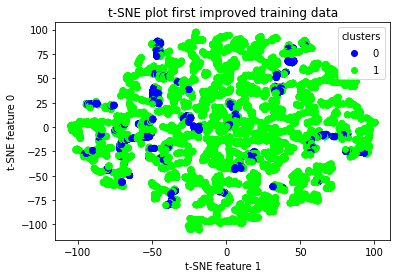

In [58]:
_ = TSNE_Plot(x_train,train_label,np.unique(train_label),'first improved training data')

c:\users\ritik\appdata\local\programs\python\python38-32\lib\site-packages\matplotlib\collections.py:1053: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if num == "auto":


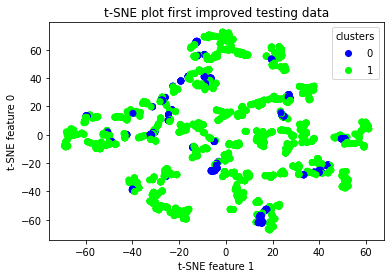

In [57]:
_ = TSNE_Plot(x_test,test_label,np.unique(test_label),'first improved testing data')

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Ritika

In [ ]:
# from sklearn.neural_network import MLPRegressor


In [ ]:
# autoencoder = MLPRegressor(alpha = 1e-15,hidden_layer_sizes=(50,100,50,2,50,100,50)
#                           , random_state=1,max_iter=20000)
# autoencoder.fit(X_train,X_train)

In [ ]:
# L= autoencoder.coefs_
# biases = autoencoder.intercepts_
# for l in L:
#     print(l.shape)

In [ ]:
# encoder_weights = W[0:4]
# encoder_biases = biases[0:4]
# def encode(encoder_weights,encoder_biases,data):
#     res_ae=data
#     for index, (w,b) in enumerate(zip(encoder_weights,encoder_biases)):
#         if index+1 == len(encoder_weights):
#             res_ae = res_ae@w+b
#         else: 
#             res_ae = np.maximum(0,res_ae@w+b)
#     return res_ae
# res_ae = encode(encoder_weights,encoder_biases,X_test)
# unique_labels =np.unique(y_test)
# for index, unique_label in enumerate(unique_labels):
#     latent_space = res_ae[y_test==unique_label]
#     plt.scatter(latent_space[:,0], latent_space[:,1],alpha=0.3,c=cols[index])
    
# plt.xlabel("Latent X")
# plt.ylabel("Latent Y")
# plt.title("Autoencoder Results")

## Testing Code

In [ ]:
# This is the dimension of the original space
input_dim = 11

# This is the dimension of the latent space (encoding space)
latent_dim = 4

encoder = Sequential([
    Dense(256, activation='relu', input_shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(latent_dim, activation='relu')
])

decoder = Sequential([
    Dense(64, activation='relu', input_shape=(latent_dim,)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(input_dim, activation=None)
])

In [ ]:
# tf.keras.backend.clear_session()
# del autoencoder

autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
def plot_orig_vs_recon(title='', n_samples=3):
    fig = plt.figure(figsize=(10,6))
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        idx = random.sample(range(train_features.shape[0]), 1)
        plt.plot(autoencoder.predict(train_features[idx]).squeeze(), label='reconstructed' if i == 0 else '')
        plt.plot(train_features[idx].squeeze(), label='original' if i == 0 else '')
        fig.axes[i].set_xticklabels(column_names)
        plt.xticks(np.arange(0, 10, 1))
        plt.grid(True)
        if i == 0: plt.legend();

plot_orig_vs_recon('Before training the encoder-decoder')

In [ ]:
model_history = autoencoder.fit(train_features, train_features, epochs=100, batch_size=32, verbose=0)

plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

In [ ]:
plot_orig_vs_recon('After training the encoder-decoder')

In [ ]:
encoded_x_train = encoder(train_features)
encoded_x_test = encoder(test_features)

In [ ]:
knn_auto = KNeighborsClassifier()
knn_auto.fit(encoded_x_train, train_label)
pred_labels = knn_auto.predict(encoded_x_test)
    
model_acc = accuracy_score(test_label, pred_labels)
# acc_list.append(round(model_acc,5))
model_acc

In [ ]:
# for p in [1,2]:
#     for j in range(len(model_list_ae)):
#         print(model_list_ae[j])
#         res_acc = evaluation(model_list_ae[j], encoded_x_train, train_label, encoded_x_test, test_label, CM=0)
#         if p == 1:
#             print('in if loop')
#             ae_acc_list[j] = []
#             ae_acc_list[j].append(res_acc)
#             print(ae_acc_list[j])
#         else:
#             print('not in if loop')
#             ae_acc_list[j].append(res_acc)
#             print(ae_acc_list[j])